# **News Article Classification**

We have a dataset of news articles categorised into politics, technology, sports, business and entertainment based on their content. We will be traing ML models like Navive bayes, RF and DT. We will also be creating a LSTM model to solve this small problem.




## Import Important libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#importing libraries for text processing
import nltk
import re

# To remove stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')

# For lemmetization
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

# For tokenization
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# For BoW & TF-IDF
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# For encoding the categorical variable
!pip install category_encoders
import category_encoders as ce

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
data_path = "/kaggle/input/news-aggregatior-classification/flipitnews-data (1).csv"

In [3]:
df = pd.read_csv(data_path)

In [4]:
df.columns, df.shape

(Index(['Category', 'Article'], dtype='object'), (2225, 2))

In [5]:
df['Category'].value_counts()

Category
Sports           511
Business         510
Politics         417
Technology       401
Entertainment    386
Name: count, dtype: int64

<Axes: xlabel='Category', ylabel='count'>

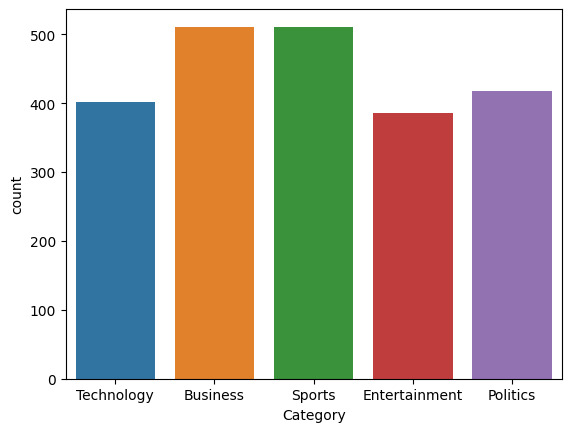

In [6]:
sns.countplot(x='Category', data=df)

Data seems to be balanced for each category. 

Let's check the article and do some text processing

In [7]:
df['Article'][0], len(df['Article'][0])

('tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-in to hig

The first article is of 4333 character.

In [8]:
!pwd

/kaggle/working


In [9]:
%cd /usr/share/nltk_data

/usr/share/nltk_data


Fixing the error related to wordnet not found


In [10]:
%cd corpora

/usr/share/nltk_data/corpora


In [11]:
!unzip wordnet.zip -d .

Archive:  wordnet.zip
   creating: ./wordnet/
  inflating: ./wordnet/lexnames      
  inflating: ./wordnet/data.verb     
  inflating: ./wordnet/index.adv     
  inflating: ./wordnet/adv.exc       
  inflating: ./wordnet/index.verb    
  inflating: ./wordnet/cntlist.rev   
  inflating: ./wordnet/data.adj      
  inflating: ./wordnet/index.adj     
  inflating: ./wordnet/LICENSE       
  inflating: ./wordnet/citation.bib  
  inflating: ./wordnet/noun.exc      
  inflating: ./wordnet/verb.exc      
  inflating: ./wordnet/README        
  inflating: ./wordnet/index.sense   
  inflating: ./wordnet/data.noun     
  inflating: ./wordnet/data.adv      
  inflating: ./wordnet/index.noun    
  inflating: ./wordnet/adj.exc       


In [12]:
stop_words = nltk.corpus.stopwords.words("english")
lemmatizer = WordNetLemmatizer()
def text_processing(text):
    #print(len(text))
    #removing anything other than alphabets
    text = re.sub('[^a-zA-Z]', ' ', text)
    
    #lowercase
    text = text.lower()
    
    words = nltk.word_tokenize(text)
    
    #removing stopword
    words = [i for i in words if i not in stop_words]
    
    # Lemmatization
    #print(len(words))
    new_txt = [lemmatizer.lemmatize(word) for word in words]
    new_txt = " ".join(new_txt)

    return new_txt
df['Article'] = df['Article'].apply(text_processing)  

In [13]:
encode = ce.OrdinalEncoder(cols=['Category'])
df = encode.fit_transform(df)

In [36]:
encode

OrdinalEncoder(cols=['Category'],
               mapping=[{'col': 'Category', 'data_type': dtype('O'),
                         'mapping': Technology       1
Business         2
Sports           3
Entertainment    4
Politics         5
NaN             -2
dtype: int64}])

In [14]:
choice = int(input("Choose \n (1) If you want to use Bag of Words \n (2) If you want to use TF-IDF \n Choice: "))

if choice == 1:
  cv = CountVectorizer(max_features=5000)
  X_ir = cv.fit_transform(df.Article)
  print(type(X_ir))  
  X = X_ir.toarray()
  y = np.array(df['Category'].values)

elif choice == 2:
  tf_idf = TfidfVectorizer()
  X_ir = tf_idf.fit_transform(df.Article)
  print(type(X_ir))  
  X = X_ir.toarray()
  y = np.array(df['Category'].values)

else:
  print("Wrong Input!")

Choose 
 (1) If you want to use Bag of Words 
 (2) If you want to use TF-IDF 
 Choice:  2


<class 'scipy.sparse._csr.csr_matrix'>


In [15]:
# To try out different ML models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# To perform train-test split
from sklearn.model_selection import train_test_split

# Performace Metrics for evaluating the model
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

In [16]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25,
                                                  shuffle=True, stratify=y,
                                                  random_state=42)

In [17]:
X.shape, y.shape

((2225, 24718), (2225,))

In [18]:
print("No. of rows in train set is {}.".format(X_train.shape[0]))
print("No. of rows in test set is {}.".format(X_val.shape[0]))

No. of rows in train set is 1668.
No. of rows in test set is 557.


In [19]:
# Training the model -
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [20]:
# Calculating the train & test accuracy -
nb_train = accuracy_score(y_train, nb.predict(X_train))
nb_test = accuracy_score(y_val, nb.predict(X_val))

print("Train accuracy :{:.3f}".format(nb_train))
print("Test accuracy :{:.3f}".format(nb_test))

Train accuracy :0.988
Test accuracy :0.977


In [21]:
# Making predictions on the test set -
y_pred_nb = nb.predict(X_val)
y_pred_proba_nb = nb.predict_proba(X_val)

In [22]:
# Computing the ROC AUC score -
print("ROC AUC Score: {:.3f}".format(roc_auc_score(y_val, y_pred_proba_nb, multi_class='ovr')))

ROC AUC Score: 0.999


In [23]:
def model_train(model_obj):
    model_obj.fit(X_train, y_train)
    y_pred = model_obj.predict(X_val)
    return y_pred
    
def model_eval(model_obj, y_pred):
    print("-"*10)
    y_pred = model_obj.predict(X_val)
    accuracy_train = accuracy_score(y_train, model_obj.predict(X_train))
    accuracy_test = accuracy_score(y_val, y_pred)
    
    print("Accuracy on Test dataset: {:.3f}".format(accuracy_test))
    print("Accuracy on train dataset:{:.3f}".format(accuracy_train))
    
    print("-"*10)
    
    
    

# Random Forest

In [24]:
#Random forest
rfc = RandomForestClassifier()

#Model training
y_pred = model_train(rfc)

#Model Evaluation
model_eval(rfc, y_pred)

----------
Accuracy on Test dataset: 0.969
Accuracy on train dataset:1.000
----------


# K Nearest Neighbour

In [25]:
# KNN 
knn = KNeighborsClassifier()
y_pred = model_train(knn)
model_eval(knn, y_pred)


----------
Accuracy on Test dataset: 0.934
Accuracy on train dataset:0.965
----------


# Descision Tree Classifier

In [26]:
dt = DecisionTreeClassifier()
y_pred = model_train(dt)
model_eval(dt, y_pred)

----------
Accuracy on Test dataset: 0.853
Accuracy on train dataset:1.000
----------


# Saving all the models

In [27]:
import joblib

In [28]:
%cd /kaggle/working/

/kaggle/working


In [29]:
joblib.dump(knn, "knn_model.joblib")
joblib.dump(rfc, "rfc_model.joblib")
joblib.dump(dt, "dt_model.joblib")
joblib.dump(nb, "nb_model.joblib")
joblib.dump(tf_idf, "tfidf.joblib")

['tfidf.joblib']

In [30]:
import sklearn
sklearn.__version__

'1.2.2'

# Using LSTM for classification

In [31]:
pwd

'/kaggle/working'

In [32]:
ls


dt_model.joblib   nb_model.joblib   tfidf.joblib
knn_model.joblib  rfc_model.joblib


In [33]:
import nltk
nltk.__version__

'3.2.4'

In [34]:
!python --version

Python 3.10.13


In [35]:
import numpy
numpy.__version__

'1.26.4'